In [198]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots

In [199]:
train_data = pd.read_csv('./mymoviedb.csv', engine='python')

In [200]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [201]:
train_data.shape

(9837, 9)

In [202]:
column_types = {'Title':'string', 'Overview':'string', 'Original_Language':'string', 'Genre':'string'}

train_data_clean = pd.read_csv('./mymoviedb.csv', engine='python', dtype=column_types)

In [203]:
train_data_clean = train_data_clean.dropna()
train_data_clean['Vote_Count'] = train_data_clean['Vote_Count'].astype(int)
train_data_clean['Popularity'] = train_data_clean['Popularity'].astype(int)
train_data_clean['Vote_Average'] = train_data_clean['Vote_Average'].astype(float)
train_data_clean['Release_Date'] = pd.to_datetime(train_data_clean['Release_Date'])

In [204]:
train_data_clean = train_data_clean.drop(columns=['Poster_Url','Overview'])

In [205]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   string        
 2   Popularity         9826 non-null   int32         
 3   Vote_Count         9826 non-null   int32         
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9826 non-null   string        
 6   Genre              9826 non-null   string        
dtypes: datetime64[ns](1), float64(1), int32(2), string(3)
memory usage: 537.4 KB


In [206]:
train_data_clean.shape

(9826, 7)

In [207]:
print(train_data_clean.isnull().sum())

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64


In [208]:
train_data_clean.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895,1793,7.0,en,"Action, Adventure, Thriller, War"


In [209]:
train_data_clean.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,39.828007,1392.943721,6.439467
min,1902-04-17 00:00:00,13.000000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.000000,146.000000,5.900000
50%,2011-09-12 00:00:00,21.000000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.000000,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.000000,31077.000000,10.000000
std,NaN,108.879786,2611.303856,1.129797


# Genres aufgeteilt und Popularity addiert

In [210]:
genre_popularity = {}

# Durchlaufen jeder Zeile im Datensatz
for i, row in train_data_clean.iterrows():
    #'Genre' string nach jedem Komma aufteilen
    genres = row['Genre'].replace(" ", "").split(",")
    # popularity in int casten(wir runden)
    popularity = int(round(row["Popularity"]))
    
    # popularity der Filme mit dem gleichen Genre wird aufsummiert
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += popularity
        else:
            genre_popularity[genre] = popularity

# Sortiere: absteigend
sorted_genres = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)

for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Action: 135363
Comedy: 113299
Drama: 110739
Thriller: 105612
Adventure: 98687
Animation: 74686
Fantasy: 68794
Family: 65208
ScienceFiction: 62398
Horror: 55500
Crime: 54965
Romance: 44818
Mystery: 30603
History: 11914
War: 10724
Music: 9809
TVMovie: 6303
Documentary: 6177
Western: 4886


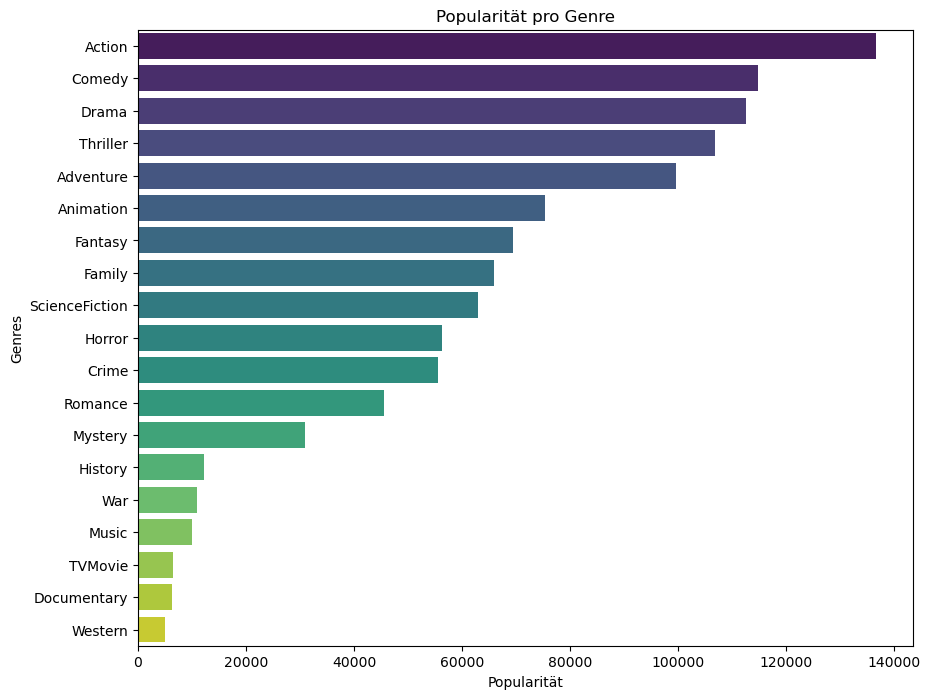

In [211]:
genre_popularity = {"Action": 136663, "Comedy": 114795, "Drama": 112622, "Thriller": 106822, 
                    "Adventure": 99560, "Animation": 75392, "Fantasy": 69425, "Family": 65918, 
                    "ScienceFiction": 63019, "Horror": 56248, "Crime": 55567, "Romance": 45583, 
                    "Mystery": 30995, "History": 12136, "War": 10871, "Music": 9968, 
                    "TVMovie": 6410, "Documentary": 6288, "Western": 4960}

genres = list(genre_popularity.keys())
popularity = list(genre_popularity.values())

# Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=popularity, y=genres, palette='viridis')
plt.xlabel('Popularität')
plt.ylabel('Genres')
plt.title('Popularität pro Genre')
plt.show()

# Anzahl der Filme in den jeweiligen Genres

In [212]:
genre_counts = train_data_clean['Genre'].str.split(', ').explode().value_counts()

print(genre_counts)

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1438
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64


## Absolutwerte nicht wirklich aussagekräftig, da sich die Anzahl der vertretenen Genres stark unterscheidet

# Durchschnittliche Beliebtheit für jedes Genre

In [213]:
genre_popularity = {}
genre_counts = {}

for i, row in train_data_clean.iterrows():
    genres = row['Genre'].split(', ')
    
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += row['Popularity']
            genre_counts[genre] += 1
        else:
            genre_popularity[genre] = row['Popularity']
            genre_counts[genre] = 1

# durchschnittliche popularity für jedes Genre
average_popularity = {genre: genre_popularity[genre] / genre_counts[genre] for genre in genre_popularity}

# Sortieren nach absteigender Reihenfolge
sorted_genres = sorted(average_popularity.items(), key=lambda x: x[1], reverse=True)

for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Adventure: 53.25796006475985
Fantasy: 52.59480122324159
Animation: 51.93741307371349
Action: 50.395755770662696
Science Fiction: 49.016496465043204
Family: 46.11598302687412
Crime: 44.25523349436393
Thriller: 42.448553054662376
Mystery: 39.589909443725745
Horror: 37.755102040816325
Comedy: 37.38007258330584
Western: 35.66423357664234
War: 34.81818181818182
Music: 33.25084745762712
Romance: 30.36449864498645
Drama: 29.577724358974358
TV Movie: 29.453271028037385
Documentary: 28.730232558139534
History: 27.901639344262296


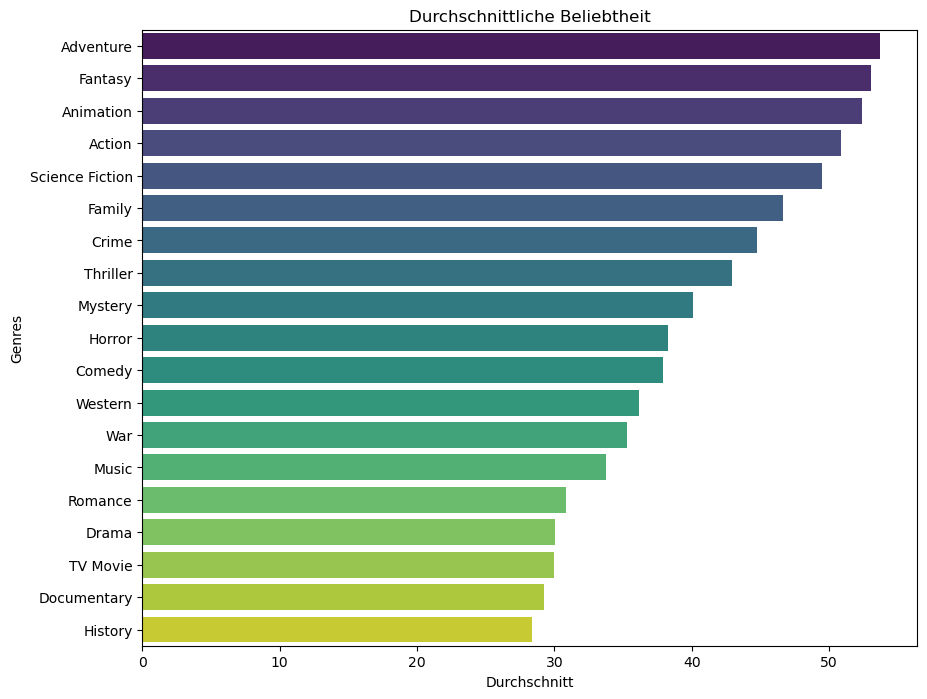

In [214]:
genres = ['Adventure', 'Fantasy', 'Animation', 'Action', 'Science Fiction', 'Family', 'Crime', 'Thriller', 'Mystery',
          'Horror', 'Comedy', 'Western', 'War', 'Music', 'Romance', 'Drama', 'TV Movie', 'Documentary', 'History']
values = [53.74288828926054, 53.08134174311917, 52.4276627260084, 50.890132911392364, 49.511333857030685, 46.6106159830269,
          44.74729549114323, 42.94625763665597, 40.09358990944373, 38.26449795918362, 37.87366875618602, 36.187912408759125,
          35.29807467532467, 33.77141016949153, 30.86603048780494, 30.077651442307708,
          29.954714953271036,29.235376744186063, 28.3958266978923]

# Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=values, y=genres, palette='viridis')
plt.xlabel('Durchschnitt')
plt.ylabel('Genres')
plt.title('Durchschnittliche Beliebtheit')
plt.show()

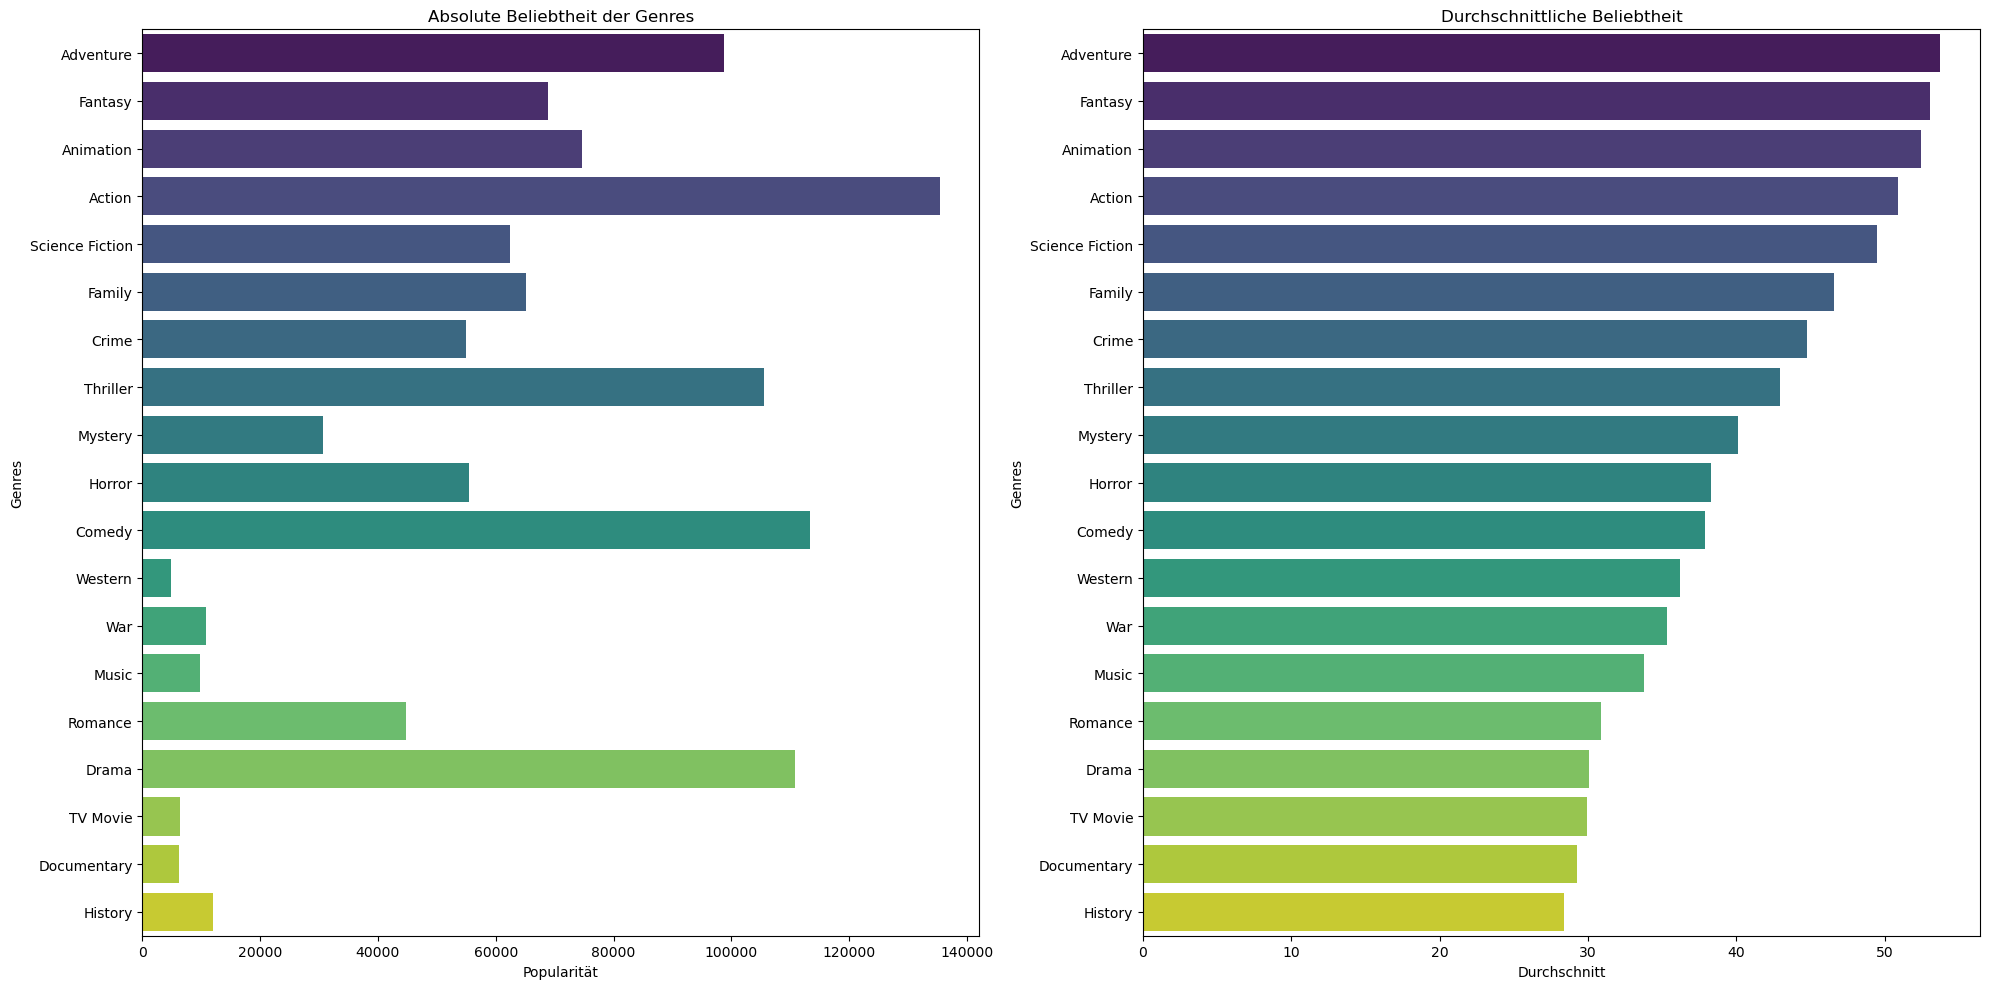

In [215]:
genre_popularity_sorted = {genre: genre_popularity[genre] for genre in genres}

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Erster Subplot
sns.barplot(x=list(genre_popularity_sorted.values()), y=list(genre_popularity_sorted.keys()), palette='viridis', ax=axs[0])
axs[0].set_xlabel('Popularität')
axs[0].set_ylabel('Genres')
axs[0].set_title('Absolute Beliebtheit der Genres')

# Zweiter Subplot
sns.barplot(x=values, y=genres, palette='viridis', ax=axs[1])
axs[1].set_xlabel('Durchschnitt')
axs[1].set_ylabel('Genres')
axs[1].set_title('Durchschnittliche Beliebtheit')

# Anzeigen der Plots
plt.tight_layout()
plt.show()

#### Die Frage “Was schaut die Welt am liebsten?” bezieht sich auf das Genre, das die meisten Zuschauer oder die höchste Gesamtpopularität hat. Es geht darum, welches Genre insgesamt am meisten gesehen wird.

#### Die “durchschnittliche Beliebtheit” eines Genres bezieht sich auf die durchschnittliche Beliebtheit der Filme innerhalb dieses Genres. Es ist möglich, dass ein Genre nur wenige, aber sehr beliebte Filme hat und daher eine hohe durchschnittliche Beliebtheit hat. Es ist aber auch möglich, dass ein Genre viele Filme hat, die nicht so beliebt sind, und daher eine niedrigere durchschnittliche Beliebtheit hat, obwohl es insgesamt mehr gesehen wird.

# Median der Popularity

In [216]:
genre_popularity_medians = train_data_clean.assign(Genre=train_data_clean['Genre'].str.split(', ')).explode('Genre').groupby('Genre')['Popularity'].median()

print(genre_popularity_medians)

Genre
Action             24.0
Adventure          25.0
Animation          27.0
Comedy             20.0
Crime              19.0
Documentary        19.0
Drama              19.0
Family             24.0
Fantasy            25.5
History            19.0
Horror             21.0
Music              18.0
Mystery            20.0
Romance            19.0
Science Fiction    24.0
TV Movie           18.0
Thriller           21.0
War                19.0
Western            18.0
Name: Popularity, dtype: float64


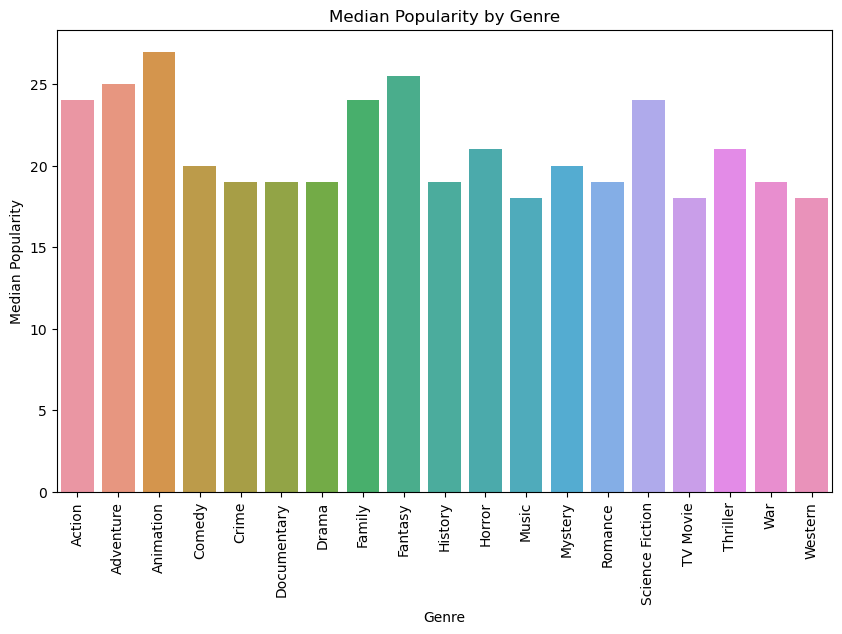

In [217]:
genre_popularity_medians = train_data_clean.assign(Genre=train_data_clean['Genre'].str.split(', ')).explode('Genre').groupby('Genre')['Popularity'].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity_medians.index, y=genre_popularity_medians.values)
plt.xlabel('Genre')
plt.ylabel('Median Popularity')
plt.title('Median Popularity by Genre')
plt.xticks(rotation=90)
plt.show()

# Correlation Matrix

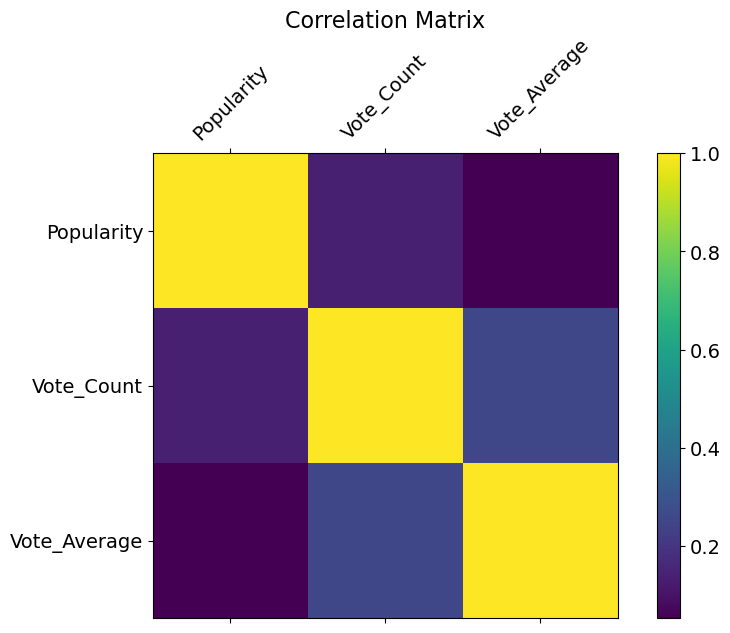

In [218]:
plt.figure(figsize=(10, 6))
numeric_data = train_data_clean.select_dtypes(include=['float64', 'int32'])
plt.matshow(numeric_data.corr(), fignum=plt.gcf().number)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Kein linearer Zusammenhang zwischen Popularity, Vote_Count und Vote_Average

# Beziehung zwischen Beliebtheit und Bewertung


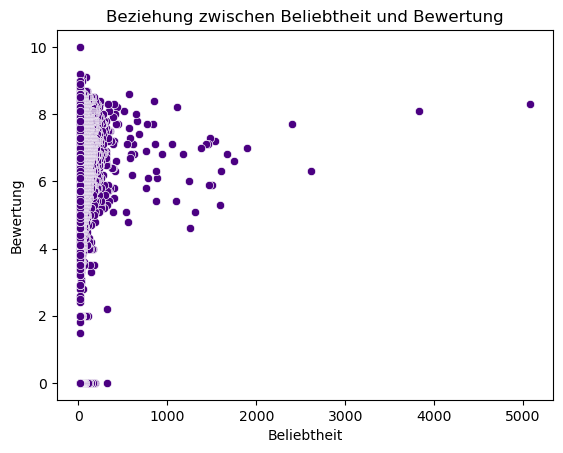

In [219]:
sns.scatterplot(x='Popularity', y='Vote_Average', data=train_data_clean, color='indigo')

plt.title('Beziehung zwischen Beliebtheit und Bewertung')
plt.xlabel('Beliebtheit')
plt.ylabel('Bewertung')

plt.show()

# Netflix-Datensatz

In [220]:
netflix_data = pd.read_csv('./netflix_titles.csv', engine='python')

In [221]:
netflix_data.info()
netflix_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

In [222]:
column_types_netflix = {'title':'string','cast':'string','type':'string','listed_in':'string'}
data_netflix_clean = pd.read_csv('./netflix_titles.csv', engine='python', dtype=column_types_netflix)
data_netflix_clean = data_netflix_clean.drop(columns=['description', 'date_added', 'duration', 'country', 'show_id', 'director', 'rating'])
data_netflix_clean = data_netflix_clean.dropna()

In [223]:
data_netflix_clean.shape

(7982, 5)

In [224]:
print(data_netflix_clean.isnull().sum())

type            0
title           0
cast            0
release_year    0
listed_in       0
dtype: int64


In [225]:
data_netflix_clean['release_year'] = pd.to_datetime(data_netflix_clean['release_year'], format='%Y')
data_netflix_clean = data_netflix_clean[data_netflix_clean['type'] != 'TV Show']
data_netflix_clean.head()


,type,title,cast,release_year,listed_in
6,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-01-01,Children & Family Movies
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",1993-01-01,"Dramas, Independent Movies, International Movies"
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-01-01,"Comedies, Dramas"
12,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021-01-01,"Dramas, International Movies"
13,Movie,Confessions of an Invisible Girl,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",2021-01-01,"Children & Family Movies, Comedies"


# Merge vom Netflix-Datensatz mit dem Originaldatnsatz

In [226]:
netflix_common_titles = pd.merge(data_netflix_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
netflix_common_titles = netflix_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [227]:
netflix_common_titles.shape

(1624, 10)

In [228]:
# Assuming netflix_common_titles is your original DataFrame

# Getting top values based on 10% of the highest Popularity value
threshold_value_netflix = netflix_common_titles['Popularity'].max() * 0.1

# Filter the DataFrame based on the threshold
netflix_top_titles = netflix_common_titles[netflix_common_titles['Popularity'] > threshold_value_netflix]

# Normalizing top titles to fit Vote_Average Scale
normalized_top_popularity_netflix = (netflix_top_titles['Popularity'] / netflix_top_titles['Popularity'].max()) * 10

# Value of popularity and Vote_Average combined
combined_rating_netflix = (normalized_top_popularity_netflix + netflix_top_titles['Vote_Average']) / 2

# Assigning a new column 'Voting_Popularity'
netflix_top_titles = netflix_top_titles.assign(Voting_Popularity=combined_rating_netflix)

# Creating a DataFrame with the rest of the titles
rest_of_titles_netflix = netflix_common_titles[~netflix_common_titles.index.isin(netflix_top_titles.index)]

# Normalizing rest of titles to fit Vote_Average Scale
normalized_rest_popularity_netflix = (rest_of_titles_netflix['Popularity'] / rest_of_titles_netflix['Popularity'].max()) * 10

# Value of popularity and Vote_Average combined for the rest of titles
combined_rest_rating_netflix = (normalized_rest_popularity_netflix + rest_of_titles_netflix['Vote_Average']) / 2

# Assigning a new column 'Voting_Popularity' for the rest of titles
rest_of_titles_netflix = rest_of_titles_netflix.assign(Voting_Popularity=combined_rest_rating_netflix)

# Concatenating the two DataFrames
combined_dataframe_netflix = pd.concat([netflix_top_titles, rest_of_titles_netflix])

# Display the combined DataFrame
print("Number of rows and columns in the combined DataFrame:", combined_dataframe_netflix.shape)


Number of rows and columns in the combined DataFrame: (1624, 11)


In [229]:
#sortiert dataframe nach Voting_Popularity in absteigender Reihnfolge
netflix_top_titles = netflix_top_titles.sort_values(by='Voting_Popularity', ascending=False)
rest_of_titles_netflix = rest_of_titles_netflix.sort_values(by='Voting_Popularity', ascending=False)
combined_dataframe_netflix = combined_dataframe_netflix.sort_values(by='Voting_Popularity', ascending=False)

In [230]:
combined_dataframe_netflix.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Voting_Popularity
982,American History X,Movie,"Edward Norton, Edward Furlong, Beverly D'Angel...",1998-01-01,Dramas,40,9399,8.4,en,Drama,9.200
1239,Kill Bill: Vol. 1,Movie,"Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl Ha...",2003-01-01,Action & Adventure,40,14358,8.0,en,"Action, Crime",9.000
1495,The Help,Movie,"Emma Stone, Viola Davis, Bryce Dallas Howard, ...",2011-01-01,Dramas,39,6085,8.2,en,Drama,8.975
730,About Time,Movie,"Domhnall Gleeson, Rachel McAdams, Bill Nighy, ...",2013-01-01,"Comedies, Dramas, International Movies",39,6761,7.9,en,"Drama, Romance, Fantasy",8.825
1240,Kill Bill: Vol. 2,Movie,"Uma Thurman, David Carradine, Michael Madsen, ...",2004-01-01,Action & Adventure,39,11494,7.9,en,"Action, Crime, Thriller",8.825


In [231]:
combined_dataframe_netflix.tail()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Voting_Popularity
934,The Ridiculous 6,Movie,"Adam Sandler, Terry Crews, Jorge Garcia, Taylo...",2015-01-01,"Action & Adventure, Comedies",47,1107,5.2,en,"Western, Comedy",3.184577
1065,Chernobyl Diaries,Movie,"Ingrid Bolsø Berdal, Dimitri Diatchenko, Olivi...",2012-01-01,"Horror Movies, Thrillers",44,1294,5.2,en,"Horror, Thriller",3.147264
478,House of the Witch,Movie,"Emily Bader, Darren Mann, Michelle Randolph, C...",2017-01-01,Horror Movies,54,113,4.8,en,"Horror, TV Movie",3.071642
20,Prey,Movie,"David Kross, Hanno Koffler, Maria Ehrich, Robe...",2021-01-01,"International Movies, Thrillers",60,215,4.6,de,Thriller,3.046269
1512,The Little Mermaid,Movie,"William Moseley, Poppy Drayton, Loreto Peralta...",2018-01-01,"Children & Family Movies, Dramas",14,0,0.0,en,"Adventure, Family, Fantasy, Romance",1.750000


## Durchschnittliche Voting_Popularity

In [232]:
print(combined_dataframe_netflix['Voting_Popularity'].mean())

5.60660237911428


# Disney-Datensatz

In [233]:
disney_data = pd.read_csv('./disney_plus_titles.csv', engine='python')
disney_data.info()
disney_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


(1450, 12)

In [234]:
column_types_disney = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}
disney_data_clean = pd.read_csv('./disney_plus_titles.csv', engine='python', dtype=column_types_disney)
disney_data_clean = disney_data_clean.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])
disney_data_clean = disney_data_clean.dropna()

In [235]:
disney_data_clean.shape

(1260, 5)

In [236]:
print(disney_data_clean.isnull().sum())

type            0
title           0
cast            0
release_year    0
listed_in       0
dtype: int64


In [237]:
disney_data_clean['release_year'] = pd.to_datetime(disney_data_clean['release_year'], format = '%Y')
disney_data_clean = disney_data_clean[disney_data_clean['type'] != 'TV Show']
disney_data_clean.head()

,type,title,cast,release_year,listed_in
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Chris Diamantopoulos, Tony Anselmo, Tress MacN...",2016-01-01,"Animation, Family"
1,Movie,Ernest Saves Christmas,"Jim Varney, Noelle Parker, Douglas Seale",1988-01-01,Comedy
2,Movie,Ice Age: A Mammoth Christmas,"Raymond Albert Romano, John Leguizamo, Denis L...",2011-01-01,"Animation, Comedy, Family"
3,Movie,The Queen Family Singalong,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",2021-01-01,Musical
5,Movie,Becoming Cousteau,"Jacques Yves Cousteau, Vincent Cassel",2021-01-01,"Biographical, Documentary"


# Merge vom Disney-Datensatz mit dem Originaldatnsatz

In [238]:
disney_common_titles = pd.merge(disney_data_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
disney_common_titles = disney_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [239]:
disney_common_titles.shape

(418, 10)

In [240]:
# Assuming disney_common_titles is your original DataFrame

# Getting top values based on 10% of the highest Popularity value
threshold_value_disney = disney_common_titles['Popularity'].max() * 0.1

# Filter the DataFrame based on the threshold
disney_top_titles = disney_common_titles[disney_common_titles['Popularity'] > threshold_value_disney]

# Normalizing top titles to fit Vote_Average Scale
normalized_top_popularity_disney = (disney_top_titles['Popularity'] / disney_top_titles['Popularity'].max()) * 10

# Value of popularity and Vote_Average combined
combined_rating_disney = (normalized_top_popularity_disney + disney_top_titles['Vote_Average']) / 2

# Assigning a new column 'Voting_Popularity'
disney_top_titles = disney_top_titles.assign(Voting_Popularity=combined_rating_disney)

# Creating a DataFrame with the rest of the titles
rest_of_titles_disney = disney_common_titles[~disney_common_titles.index.isin(disney_top_titles.index)]

# Normalizing rest of titles to fit Vote_Average Scale
normalized_rest_popularity_disney = (rest_of_titles_disney['Popularity'] / rest_of_titles_disney['Popularity'].max()) * 10

# Value of popularity and Vote_Average combined for the rest of titles
combined_rest_rating_disney = (normalized_rest_popularity_disney + rest_of_titles_disney['Vote_Average']) / 2

# Assigning a new column 'Voting_Popularity' for the rest of titles
rest_of_titles_disney = rest_of_titles_disney.assign(Voting_Popularity=combined_rest_rating_disney)

# Concatenating the two DataFrames
combined_dataframe_disney = pd.concat([disney_top_titles, rest_of_titles_disney])

# Display the combined DataFrame
print("Number of rows and columns in the combined DataFrame:", combined_dataframe_disney.shape)


Number of rows and columns in the combined DataFrame: (418, 11)


In [241]:
#sortiert dataframe nach Voting_Popularity in absteigender Reihnfolge
disney_top_titles = disney_top_titles.sort_values(by='Voting_Popularity', ascending=False)
rest_of_titles_disney = rest_of_titles_disney.sort_values(by='Voting_Popularity', ascending=False)
combined_dataframe_disney = combined_dataframe_disney.sort_values(by='Voting_Popularity', ascending=False)

In [242]:
combined_dataframe_disney.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Voting_Popularity
28,Cruella,Movie,"Emma Stone, Emma Thompson, Joel Fry, Paul Walt...",2021-01-01,"Crime, Drama",429,6675,8.2,en,"Comedy, Crime",9.100000
44,Luca,Movie,"Jacob Tremblay, Jack Dylan Grazer, Emma Berman...",2021-01-01,"Animation, Buddy, Coming of Age",408,5886,8.0,en,"Animation, Comedy, Family, Fantasy",8.755245
27,Happier Than Ever: A Love Letter to Los Angeles,Movie,"Billie Eilish, FINNEAS",2021-01-01,"Concert Film, Music",39,83,8.0,en,Music,8.642857
257,Mary Poppins,Movie,"Julie Andrews, Dick Van Dyke, David Tomlinson,...",1964-01-01,"Family, Fantasy, Musical",40,3894,7.6,en,"Comedy, Family, Fantasy",8.561905
156,10 Things I Hate About You,Movie,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",1999-01-01,"Comedy, Coming of Age, Romance",40,6326,7.6,en,"Comedy, Romance, Drama",8.561905


In [243]:
combined_dataframe_disney.tail()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Voting_Popularity
91,Beverly Hills Chihuahua,Movie,"Piper Perabo, Manolo Cardona, Jamie Curtis, Jo...",2008-01-01,"Action-Adventure, Comedy, Family",59,840,5.3,en,"Comedy, Family, Adventure, Romance",3.337646
377,The Wild,Movie,"Kiefer Sutherland, Jim Belushi, Eddie Izzard, ...",2006-01-01,"Action-Adventure, Animation, Comedy",50,824,5.5,en,"Family, Animation",3.332751
87,Home Alone 3,Movie,"Alex D. Linz, Haviland Morris, Olek Krupa",1997-01-01,"Comedy, Family",47,2402,5.3,en,"Comedy, Family",3.197786
32,Fantastic Four,Movie,"Ioan Gruffudd, Jessica Alba, Chris Evans, Mich...",2005-01-01,"Action-Adventure, Family, Science Fiction",55,5078,4.4,en,"Action, Adventure, Science Fiction",2.841026
348,The Little Mermaid,Movie,"René Auberjonois, Christopher Barnes, Jodi Ben...",1989-01-01,"Animation, Family, Fantasy",14,0,0.0,en,"Adventure, Family, Fantasy, Romance",1.666667


## Durchschnittliche Voting_Popularity

In [244]:
print(combined_dataframe_disney['Voting_Popularity'].mean())

5.482072950972472


# Amazon Prime Datensatz

In [245]:
amazon_data = pd.read_csv('./amazon_prime_titles.csv', engine='python')
amazon_data.info()
amazon_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


(9668, 12)

In [246]:
column_types_amazon = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}

amazon_data_clean = pd.read_csv('./amazon_prime_titles.csv', engine='python', dtype=column_types_amazon)
amazon_data_clean = amazon_data_clean.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])
amazon_data_clean = amazon_data_clean.dropna()

In [247]:
amazon_data_clean.shape

(8435, 5)

In [248]:
print(amazon_data_clean.isnull().sum())

type            0
title           0
cast            0
release_year    0
listed_in       0
dtype: int64


In [249]:
amazon_data_clean['release_year'] = pd.to_datetime(amazon_data_clean['release_year'], format = '%Y')
amazon_data_clean = amazon_data_clean[amazon_data_clean['type'] != 'TV Show']
amazon_data_clean.head()

,type,title,cast,release_year,listed_in
0,Movie,The Grand Seduction,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,"Comedy, Drama"
1,Movie,Take Care Good Night,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,"Drama, International"
2,Movie,Secrets of Deception,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,Documentary
4,Movie,Monster Maker,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,"Drama, Fantasy"


# Merge vom Amazon Prime-Datensatz mit dem Originaldatnsatz

In [250]:
amazon_common_titles = pd.merge(amazon_data_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
amazon_common_titles = amazon_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [251]:
amazon_common_titles.shape

(669, 10)

In [252]:
# Assuming amazon_common_titles is your original DataFrame

# Getting top values based on 10% of the highest Popularity value
threshold_value_amazon = amazon_common_titles['Popularity'].max() * 0.1

# Filter the DataFrame based on the threshold
amazon_top_titles = amazon_common_titles[amazon_common_titles['Popularity'] > threshold_value_amazon]

# Normalizing top titles to fit Vote_Average Scale
normalized_top_popularity_amazon = (amazon_top_titles['Popularity'] / amazon_top_titles['Popularity'].max()) * 10

# Value of popularity and Vote_Average combined
combined_rating_amazon = (normalized_top_popularity_amazon + amazon_top_titles['Vote_Average']) / 2

# Assigning a new column 'Voting_Popularity'
amazon_top_titles = amazon_top_titles.assign(Voting_Popularity=combined_rating_amazon)

# Creating a DataFrame with the rest of the titles
rest_of_titles_amazon = amazon_common_titles[~amazon_common_titles.index.isin(amazon_top_titles.index)]

# Normalizing rest of titles to fit Vote_Average Scale
normalized_rest_popularity_amazon = (rest_of_titles_amazon['Popularity'] / rest_of_titles_amazon['Popularity'].max()) * 10

# Value of popularity and Vote_Average combined for the rest of titles
combined_rest_rating_amazon = (normalized_rest_popularity_amazon + rest_of_titles_amazon['Vote_Average']) / 2

# Assigning a new column 'Voting_Popularity' for the rest of titles
rest_of_titles_amazon = rest_of_titles_amazon.assign(Voting_Popularity=combined_rest_rating_amazon)

# Concatenating the two DataFrames
combined_dataframe_amazon = pd.concat([amazon_top_titles, rest_of_titles_amazon])

# Display the combined DataFrame
print("Number of rows and columns in the combined DataFrame:", combined_dataframe_amazon.shape)

Number of rows and columns in the combined DataFrame: (669, 11)


In [253]:
#sortiert dataframe nach Voting_Popularity in absteigender Reihnfolge
amazon_top_titles = amazon_top_titles.sort_values(by='Voting_Popularity', ascending=False)
rest_of_titles_amazon = rest_of_titles_amazon.sort_values(by='Voting_Popularity', ascending=False)
combined_dataframe_amazon = combined_dataframe_amazon.sort_values(by='Voting_Popularity', ascending=False)

In [254]:
combined_dataframe_amazon.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Voting_Popularity
280,Nobody,Movie,"Costas Mandylor, Darren Wall, Ed O'Ross, Dawn ...",2007-01-01,"Horror, Suspense",175,4292,8.2,en,"Action, Crime, Thriller",9.100000
269,Joker,Movie,"Guru Somasundaram, Ramya Pandiyan, Gayathri, R...",2016-01-01,"Comedy, Drama, International",155,20016,8.2,en,"Crime, Thriller, Drama",8.528571
330,Brothers,Movie,"Akshay Kumar, Sidharth Malhotra, Jackie Shroff...",2015-01-01,"Action, Drama, Sports",169,2085,7.1,en,"Drama, Thriller, War",8.378571
67,Legend,Movie,"Sam Cooke, Lou Rawls, Aretha Franklin, Bobby W...",2021-01-01,Documentary,165,2856,6.9,en,"Crime, Thriller",8.164286
281,No Exit,Movie,"John Brynes, Marie Weigle",2021-01-01,"Comedy, Horror",2618,122,6.3,en,Thriller,8.150000


In [255]:
combined_dataframe_amazon.tail()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Voting_Popularity
277,Sharknado,Movie,"Tara Reid, Ian Ziering, John Heard, Cassie Sce...",2013-01-01,"Action, Comedy, Horror",13,1293,3.9,en,"Fantasy, Horror, Action, Comedy, TV Movie, Sci...",2.321429
234,Meteor Moon,Movie,"Dominique Swain, Michael Broderick, Chris Boud...",2019-01-01,"Action, Science Fiction",14,9,2.6,en,"Adventure, Science Fiction",1.700000
177,The Perfect Wedding,Movie,"James Rebhorn, Kristine Sutherland, Eric Arago...",2013-01-01,"Comedy, Kids, LGBTQ",15,1,2.0,en,"Thriller, TV Movie",1.428571
174,X,Movie,"Hope Raymond, Eliza Boivin, Brian Smick",2021-01-01,"Drama, Suspense",21,0,0.0,en,"Horror, Thriller, Mystery",0.600000
383,Sideshow,Movie,"Les Dennis, April Pearson, Nathan Clarke, Anth...",2021-01-01,Suspense,14,0,0.0,en,"Comedy, Crime",0.400000


In [256]:
print(combined_dataframe_amazon['Voting_Popularity'].mean())

3.9505443514544014


In [257]:
top_ten_netflix=combined_dataframe_netflix.head(10)
top_ten_disney=combined_dataframe_disney.head(10)
top_ten_amazon=combined_dataframe_amazon.head(10)

In [258]:
print(top_ten_disney["Voting_Popularity"].mean())
print(top_ten_netflix["Voting_Popularity"].mean())
print(top_ten_amazon["Voting_Popularity"].mean())

8.480524475524474
8.809999999999999
7.972857142857142


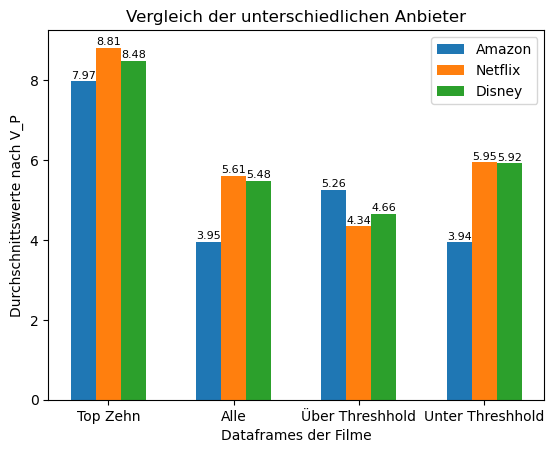

In [269]:

# Example data
labels = ['Top Zehn', 'Alle', 'Über Threshhold','Unter Threshhold']
amazon_values = [top_ten_amazon["Voting_Popularity"].mean(), combined_dataframe_amazon['Voting_Popularity'].mean(), amazon_top_titles['Voting_Popularity'].mean(), rest_of_titles_amazon['Voting_Popularity'].mean()]
netflix_values = [top_ten_netflix["Voting_Popularity"].mean(), combined_dataframe_netflix['Voting_Popularity'].mean(), netflix_top_titles['Voting_Popularity'].mean(), rest_of_titles_netflix['Voting_Popularity'].mean()]
disney_values = [top_ten_disney["Voting_Popularity"].mean(), combined_dataframe_disney['Voting_Popularity'].mean(), disney_top_titles['Voting_Popularity'].mean(), rest_of_titles_disney['Voting_Popularity'].mean()]

bar_width = 0.2  # Width of each bar

# Set up the positions for the bars
positions_1 = np.arange(len(labels))
positions_2 = positions_1 + bar_width
positions_3 = positions_1 + 2 * bar_width

# Create the bar chart
plt.bar(positions_1, amazon_values, width=bar_width, label='Amazon')
plt.bar(positions_2, netflix_values, width=bar_width, label='Netflix')
plt.bar(positions_3, disney_values, width=bar_width, label='Disney')

# Add labels and title
plt.xlabel('Dataframes der Filme')
plt.ylabel('Durchschnittswerte nach V_P')
plt.title('Vergleich der unterschiedlichen Anbieter')
plt.xticks(positions_1 + bar_width, labels)

for i in range(len(positions_1)):
    plt.text(positions_1[i], amazon_values[i] + 0.02, f'{amazon_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(positions_2[i], netflix_values[i] + 0.02, f'{netflix_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(positions_3[i], disney_values[i] + 0.02, f'{disney_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()